# Activité : modèles de recommandation

<img src="https://cdn.pixabay.com/photo/2013/07/12/18/38/rating-153609_1280.png" alt="étoile" width="400"/>

#### [Pierre-Loic BAYART](https://www.linkedin.com/in/pierreloicbayart/) - Formation développeur d'applications spécialisation data analyst - Webforce3 - Grenoble Ecole de Management

## 🔍 Recherche d'informations

En recherchant sur le web, trouver les réponses aux questions suivantes :

### - Qu'est-ce qu'un système de recommandation ? Donner des exemples d'utilisations
___
Un système de recommandation est un système de filtrage de l'information qui est susceptible d'intéresser l'utilisateur.

Exemples d'utilisation :
- Sites d'e-commerce
- Réseaux sociaux
- Sites de vidéos, de musiques, de livres...
___
### - Comment fonctionne les systèmes de recommandation basés sur le contenu (content based filtering) ? Lister un avantage et un inconvénients de ces systèmes de recommandation
___
Le **modèle de recommandation** s'appuie sur les **caractéristiques du contenu** (ou des produits) intéressant l'utilisateur pour **proposer d'autres contenus**.

**Avantage :**
- Fonctionne sans les avis des utilisateurs

**Inconvénient :**
- Nécessite des caractèristiques pour le contenu

___
### - Comment fonctionne les systèmes de filtrage collaboratif (collaborative filtering) ? Lister un avantage et un inconvénients de ces systèmes de recommandation
___
Le **modèle de recommandation** s'appuie sur les **avis (explicites ou implicites) des utilisateurs** et non sur les caractéristiques des produits pour proposer des produits ayant intéréssés des utilisateurs aux avis similaires.
**Avantage :**
- Fonctionne sans informations sur le contenu ou le produit

**Inconvénient :**
- Nécessite des avis sur le contenu ou le produit
___
### - En quoi consiste le problème du "démarrage à froid" (cold start) pour les systèmes de recommandation ? Quelle solution peut-on utiliser pour résoudre le problème ?
___
Le problème du **"démarrage à froid"** a lieu lorsque l'on n'a **pas d'informations** sur les utilisateurs. On ne peut donc pas se baser sur l'intérêt pour le contenu ou les similarités d'intérêt pour le contenu.
Dans ce cas, on peut recommander les contenus qui suscitent **le plus d'intérêt**.
___
### - A quoi sert la bibliothèque Surprise ?
___
La bibliothèque Surprise permet d'entrainer des modèles de recommandation.
___

## ✏️ Activités

Ressources : 

- [Jeu de données complet](https://grouplens.org/datasets/movielens/20m/)
- [Base d'inspiration de l'activité](https://github.com/hyunjoonbok/Python-Projects/blob/master/GeneralML/RecommendationModel/Recommendation%20System%20-%20Matrix%20Factoization%20(Collaboratvie%20Filtering)%20using%20Surprise%20Library.ipynb)

___

- Récupérer les données dans un dataframe Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

r = urlopen("http://files.grouplens.org/datasets/movielens/ml-latest-small.zip")
zipfile = ZipFile(BytesIO(r.read()))

rating_data = pd.read_csv(zipfile.open('ml-latest-small/ratings.csv'))
movie_data = pd.read_csv(zipfile.open('ml-latest-small/movies.csv'))

In [3]:
movie_data

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
rating_data

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


- Trouver les **valeurs extrêmes** pour les critiques. Afficher la **distribution des valeurs des critiques**

In [5]:
print(f"Min des ratings : {rating_data.rating.min()}")
print(f"Min des ratings : {rating_data.rating.max()}")

Min des ratings : 0.5
Min des ratings : 5.0


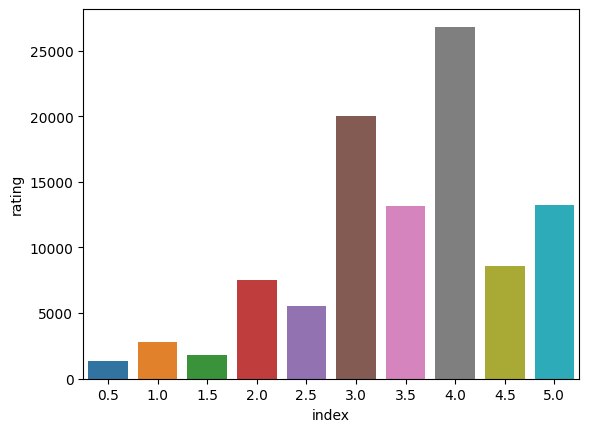

In [6]:
df_plot = pd.DataFrame(rating_data.rating.value_counts()).reset_index()
sns.barplot(data=df_plot, x="index", y="rating")
plt.show()

- Trouver la liste des **10 films avec le plus de critiques**

In [11]:
top_df = rating_data.groupby("movieId").count().sort_values(by="rating", ascending=False).iloc[:10]
top_df.merge(movie_data, how="inner", on="movieId")

,movieId,userId,rating,timestamp,title,genres
0,356,329,329,329,Forrest Gump (1994),Comedy|Drama|Romance|War
1,318,317,317,317,"Shawshank Redemption, The (1994)",Crime|Drama
2,296,307,307,307,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,593,279,279,279,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
4,2571,278,278,278,"Matrix, The (1999)",Action|Sci-Fi|Thriller
5,260,251,251,251,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
6,480,238,238,238,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
7,110,237,237,237,Braveheart (1995),Action|Drama|War
8,589,224,224,224,Terminator 2: Judgment Day (1991),Action|Sci-Fi
9,527,220,220,220,Schindler's List (1993),Drama|War


- Trouver la liste des **10 films les plus appréciés en moyenne**

In [12]:
top_df = rating_data.groupby("movieId").mean().sort_values(by="rating", ascending=False).iloc[:10]
top_df.merge(movie_data, how="inner", on="movieId")

,movieId,userId,rating,timestamp,title,genres
0,88448,483.0,5.0,1.315438e+09,Paper Birds (Pájaros de papel) (2010),Comedy|Drama
1,100556,462.0,5.0,1.456151e+09,"Act of Killing, The (2012)",Documentary
2,143031,89.0,5.0,1.520409e+09,Jump In! (2007),Comedy|Drama|Romance
3,143511,105.0,5.0,1.526207e+09,Human (2015),Documentary
4,143559,89.0,5.0,1.520410e+09,L.A. Slasher (2015),Comedy|Crime|Fantasy
5,6201,474.0,5.0,1.100120e+09,Lady Jane (1986),Drama|Romance
6,102217,63.0,5.0,1.443200e+09,Bill Hicks: Revelations (1993),Comedy
7,102084,380.0,5.0,1.493422e+09,Justice League: Doom (2012),Action|Animation|Fantasy
8,6192,182.0,5.0,1.063275e+09,Open Hearts (Elsker dig for evigt) (2002),Romance
9,145994,105.0,5.0,1.526207e+09,Formula of Love (1984),Comedy


- Trouver la liste des **10 films les plus clivants**

In [13]:
top_df = rating_data.groupby("movieId").std().sort_values(by="rating", ascending=False).iloc[:10]
top_df.merge(movie_data, how="inner", on="movieId")

,movieId,userId,rating,timestamp,title,genres
0,2068,85.559921,3.181981,1.071043e+08,Fanny and Alexander (Fanny och Alexander) (1982),Drama|Fantasy|Mystery
1,32892,326.683333,3.181981,5.563466e+07,Ivan's Childhood (a.k.a. My Name is Ivan) (Iva...,Drama|War
2,7564,236.173665,2.828427,3.250676e+05,Kwaidan (Kaidan) (1964),Horror
3,84847,5.656854,2.828427,3.955957e+07,Emma (2009),Comedy|Drama|Romance
4,484,248.901587,2.828427,5.296211e+06,Lassie (1994),Adventure|Children
5,3223,316.076731,2.828427,1.990699e+06,"Zed & Two Noughts, A (1985)",Drama
6,70946,306.614307,2.598076,1.116399e+08,Troll 2 (1990),Fantasy|Horror
7,46337,281.428499,2.474874,3.328820e+07,Garfield: A Tail of Two Kitties (2006),Animation|Children|Comedy
8,27251,50.204581,2.474874,1.291867e+08,"10th Kingdom, The (2000)",Adventure|Comedy|Fantasy
9,85885,197.282792,2.474874,1.487084e+08,Room in Rome (Habitación en Roma) (2010),Drama|Romance


- Créer un dataframe des films avec **plus de 2 critiques** et les utilisateurs avec plus de **5 critiques**

In [14]:
filtered_df = rating_data.groupby("movieId").filter(lambda x: x['movieId'].count() >= 2)
filtered_df = filtered_df.groupby("userId").filter(lambda x: x['userId'].count() >= 5)
filtered_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


- Parmi ces films, trouver la liste des **10 films** les **plus appréciés en moyenne**, les **moins appréciés en moyenne**, les **plus clivants** et les **moins clivants**

In [15]:
top_df = filtered_df.groupby("movieId").mean().sort_values(by="rating", ascending=False).iloc[:10]
top_df.merge(movie_data, how="inner", on="movieId")

,movieId,userId,rating,timestamp,title,genres
0,99,397.000000,5.000000,8.921209e+08,Heidi Fleiss: Hollywood Madam (1995),Documentary
1,6442,448.500000,5.000000,1.235423e+09,Belle époque (1992),Comedy|Romance
2,1151,115.000000,5.000000,9.102574e+08,Lesson Faust (1994),Animation|Comedy|Drama|Fantasy
3,53,344.000000,5.000000,9.263241e+08,Lamerica (1994),Adventure|Drama
4,78836,464.000000,5.000000,1.463352e+09,Enter the Void (2009),Drama
5,6818,436.000000,5.000000,1.520707e+09,Come and See (Idi i smotri) (1985),Drama|War
6,3473,379.500000,5.000000,9.537307e+08,Jonah Who Will Be 25 in the Year 2000 (Jonas q...,Comedy
7,6460,284.800000,4.900000,1.029904e+09,"Trial, The (Procès, Le) (1962)",Drama
8,26810,475.666667,4.833333,1.218214e+09,Bad Boy Bubby (1993),Drama
9,115122,422.000000,4.833333,1.471733e+09,What We Do in the Shadows (2014),Comedy|Horror


In [16]:
top_df = filtered_df.groupby("movieId").mean().sort_values(by="rating", ascending=True).iloc[:10]
top_df.merge(movie_data, how="inner", on="movieId")

,movieId,userId,rating,timestamp,title,genres
0,4580,490.50,0.50,1.506847e+09,Cyborg (1989),Action|Sci-Fi
1,5672,301.50,0.50,1.171257e+09,Pokemon 4 Ever (a.k.a. Pokémon 4: The Movie) (...,Adventure|Animation|Children|Fantasy
2,4412,395.00,0.75,1.081134e+09,"Thing with Two Heads, The (1972)",Comedy|Horror|Sci-Fi
3,3774,314.25,0.75,1.159503e+09,House Party 2 (1991),Comedy|Drama|Romance
4,55292,258.50,0.75,1.340021e+09,"Comebacks, The (2007)",Comedy
5,1328,439.00,0.75,1.076493e+09,"Amityville Curse, The (1990)",Horror
6,4125,506.50,0.75,1.255135e+09,Leonard Part 6 (1987),Comedy|Sci-Fi
7,8290,417.50,0.75,1.107354e+09,Mitchell (1975),Action|Crime
8,59306,162.50,0.75,1.220530e+09,Prom Night (2008),Horror|Mystery|Thriller
9,8387,461.00,0.80,1.306038e+09,Police Academy: Mission to Moscow (1994),Comedy|Crime


In [17]:
top_df = filtered_df.groupby("movieId").std().sort_values(by="rating", ascending=False).iloc[:10]
top_df.merge(movie_data, how="inner", on="movieId")

,movieId,userId,rating,timestamp,title,genres
0,2068,85.559921,3.181981,1.071043e+08,Fanny and Alexander (Fanny och Alexander) (1982),Drama|Fantasy|Mystery
1,32892,326.683333,3.181981,5.563466e+07,Ivan's Childhood (a.k.a. My Name is Ivan) (Iva...,Drama|War
2,7564,236.173665,2.828427,3.250676e+05,Kwaidan (Kaidan) (1964),Horror
3,84847,5.656854,2.828427,3.955957e+07,Emma (2009),Comedy|Drama|Romance
4,484,248.901587,2.828427,5.296211e+06,Lassie (1994),Adventure|Children
5,3223,316.076731,2.828427,1.990699e+06,"Zed & Two Noughts, A (1985)",Drama
6,70946,306.614307,2.598076,1.116399e+08,Troll 2 (1990),Fantasy|Horror
7,46337,281.428499,2.474874,3.328820e+07,Garfield: A Tail of Two Kitties (2006),Animation|Children|Comedy
8,27251,50.204581,2.474874,1.291867e+08,"10th Kingdom, The (2000)",Adventure|Comedy|Fantasy
9,85885,197.282792,2.474874,1.487084e+08,Room in Rome (Habitación en Roma) (2010),Drama|Romance


In [18]:
top_df = filtered_df.groupby("movieId").std().sort_values(by="rating", ascending=True).iloc[:10]
top_df.merge(movie_data, how="inner", on="movieId")

,movieId,userId,rating,timestamp,title,genres
0,4009,56.568542,0.0,8.052886e+04,Talk Radio (1988),Drama
1,80551,52.325902,0.0,7.637651e+07,Eat Pray Love (2010),Drama|Romance
2,1929,148.492424,0.0,2.407136e+08,Grand Hotel (1932),Drama|Romance
3,53574,112.429978,0.0,1.273450e+08,"TV Set, The (2006)",Comedy|Drama
4,6509,313.955411,0.0,9.250959e+07,Ali: Fear Eats the Soul (Angst essen Seele auf...,Drama|Romance
5,6448,318.198052,0.0,1.415023e+08,"Flight of the Phoenix, The (1965)",Action|Adventure|Drama
6,6442,48.790368,0.0,2.547799e+08,Belle époque (1992),Comedy|Romance
7,33815,234.052345,0.0,1.821897e+08,"Perfect Man, The (2005)",Comedy|Drama|Romance
8,2425,62.932504,0.0,5.494702e+07,"General, The (1998)",Crime
9,118924,82.024387,0.0,1.588926e+07,Top Five (2014),Comedy


- Créer une **matrice** avec les **colonnes** correspondant aux **id des films** et les **lignes** aux **id des utilisateurs** (matrice creuse)

In [ ]:
matrix = filtered_df.pivot(index = 'userId', columns ='movieId', values = 'rating')

In [ ]:
matrix

- A l'aide de la bibliothèque **surprise**, entrainer un **modèle SVD**

In [ ]:
from surprise import SVD
from surprise.reader import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate

In [ ]:
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(filtered_df[["userId","movieId","rating"]], reader=reader)
trainset = data.build_full_trainset()
testset = trainset.build_anti_testset()

In [ ]:
algo = SVD(n_factors = 3)
cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)

- Trouver le meilleur **nombre de facteurs latents** grâce à une **recherche par grille**

In [ ]:
from surprise.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_factors': [4,6,9,11,14,18,29]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
gs.fit(data)
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

- Entrainer le **modèle SVD** avec le **nombre de facteurs latents** trouvés à la **question précédente**

In [ ]:
algo_SVD = SVD(n_factors = 11)
algo_SVD.fit(trainset)
testset = trainset.build_anti_testset()
predictions = algo_SVD.test(testset)
predictions[0:2]

- Utiliser le code suivant pour effectuer une **recommandation par utilisateur**

In [ ]:
from collections import defaultdict

def get_top_n(predictions, userId, movies_df, ratings_df, n = 10):
    '''Return the top N (default) movieId for a user,.i.e. userID and history for comparisom
    Args:
    Returns: 
  
    '''
    #Peart I.: Surprise docomuntation
    
    #1. First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    #2. Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_n[uid] = user_ratings[: n ]
    
    #Part II.: inspired by: https://beckernick.github.io/matrix-factorization-recommender/
    
    #3. Tells how many movies the user has already rated
    user_data = ratings_df[ratings_df.userId == (userId)]
    print('User {0} has already rated {1} movies.'.format(userId, user_data.shape[0]))

    
    #4. Data Frame with predictions. 
    preds_df = pd.DataFrame([(id, pair[0],pair[1]) for id, row in top_n.items() for pair in row],
                        columns=["userId" ,"movieId","rat_pred"])
    
    
    #5. Return pred_usr, i.e. top N recommended movies with (merged) titles and genres. 
    pred_usr = preds_df[preds_df["userId"] == (userId)].merge(movies_df, how = 'left', left_on = 'movieId', right_on = 'movieId')
            
    #6. Return hist_usr, i.e. top N historically rated movies with (merged) titles and genres for holistic evaluation
    hist_usr = ratings_df[ratings_df.userId == (userId) ].sort_values("rating", ascending = False).merge\
    (movies_df, how = 'left', left_on = 'movieId', right_on = 'movieId')
    
    
    return hist_usr, pred_usr

In [ ]:
hist_SVD_1, pred_SVD_1 = get_top_n(predictions, movies_df = movie_data, userId = 1, ratings_df = rating_data)
hist_SVD_1.head(15)

In [ ]:
pred_SVD_1

## 🚀 Pour aller plus loin

- [Recommender system - Wikipedia](https://en.wikipedia.org/wiki/Recommender_system)

___
*👨‍🏫 [Pierre-Loic BAYART](https://www.linkedin.com/in/pierreloicbayart/) - Formation développeur d'applications spécialisation data analyst - Webforce3 - Grenoble Ecole de Management*
___
Source images d'illustration : Image par OpenClipart-Vectors de Pixabay